# Project: Predictive Modeling for Monthly Total Remittances

## Step 1:Problem and Objectives

**Problem Statement:**
The objective of this project is to develop a predictive model that accurately estimates the total remittances for a given month based on available partial data. As the remittance data is collected throughout the month, the goal is to provide timely and accurate predictions to assist organizations and stakeholders in decision-making.

**Objectives:**
1. **Prediction Accuracy:** Build a model that can predict the total remittances for a specific month with a high level of accuracy. This involves training the model on historical data and evaluating its performance on a test set.

2. **Timeliness:** Develop a model that can make predictions at different points in the month. This could include mid-month predictions and end-of-month predictions, catering to the varying needs of stakeholders who may require timely information.

3. **Adaptability:** Create a flexible model that can adapt to changing patterns and trends in remittance data over time. This adaptability is crucial for ensuring the model's effectiveness in dynamic economic environments.

4. **Feature Importance:** Identify and analyze the importance of different features in predicting total remittances. Understanding the key factors influencing remittance amounts can provide valuable insights for decision-makers.

5. **Communication:** Establish a clear communication plan for disseminating predictive results to relevant stakeholders. This involves presenting predictions in an understandable format and conveying any uncertainties associated with the predictions.

**Time Frame for Predictions:**
The predictive model will be designed to generate estimates at different time intervals within a given month. This could include mid-month predictions, which provide an early indication of expected remittances, and end-of-month predictions, which aim to provide a more finalized estimate as additional data becomes available.

By addressing these objectives and specifying the time frame for predictions, this project aims to create a robust and effective predictive modeling solution for monthly total remittances, contributing to informed decision-making in the context of diaspora remittance management.

**Measurable Objectives:**

1. **Prediction Accuracy:**
   - Achieve a Mean Absolute Percentage Error (MAPE) of less than 5% on the test set.
   - Attain a Root Mean Squared Error (RMSE) of less than 2% of the average total remittances on the test set.

2. **Timeliness:**
   - Generate mid-month predictions with at least 80% accuracy compared to the final end-of-month predictions.
   - Provide end-of-month predictions with an accuracy within 5% of the actual total remittances.

3. **Adaptability:**
   - Implement a model that can adapt to at least a 10% fluctuation in remittance patterns compared to the historical data.

4. **Feature Importance:**
   - Identify and rank the top three features influencing total remittances, with a cumulative importance of at least 80%.

5. **Communication:**
   - Establish a feedback mechanism to gather user feedback on the usefulness and clarity of the provided predictions.
   - Achieve a user satisfaction rating of at least 4 out of 5 based on feedback surveys.

**Potential Impact and Applications:**

1. **Informed Decision-Making:**
   - Stakeholders can use accurate predictions to make informed decisions on budgeting, resource allocation, and strategic planning.

2. **Risk Mitigation:**
   - Financial institutions and organizations can use predictive insights to anticipate potential economic risks associated with variations in remittance patterns.

3. **Operational Efficiency:**
   - Improved forecasting allows organizations to optimize their operations, ensuring they are well-prepared to handle variations in remittance volumes.

4. **Policy Formulation:**
   - Governments can leverage accurate remittance predictions to formulate effective policies related to economic development and financial stability.

**Criteria for Success (Key Performance Indicators - KPIs):**

1. **Model Performance:**
   - MAPE and RMSE metrics within the specified thresholds.
   - Consistent accuracy across mid-month and end-of-month predictions.

2. **Adaptability:**
   - Successful adaptation to changes in remittance patterns without compromising accuracy.

3. **Feature Importance:**
   - Clear identification of influential features with a high cumulative importance.

4. **Communication:**
   - User satisfaction ratings meet or exceed the predefined threshold.
   - Feedback loop establishes a continuous improvement process for the model.

5. **Implementation:**
   - Successful integration of the predictive model into the existing systems.
   - Adherence to project timelines and budget constraints.

   Year  Month North America     Europe Rest of World  \
0  2023      1    212,010.98  59,838.87     77,541.98   
1  2023      2    189,034.56  56,820.89     63,317.25   
2  2023      3    212,079.84  66,569.69     78,330.94   
3  2023      4    187,888.79  53,533.53     78,894.28   
4  2023      5    195,185.70  62,490.54     94,429.56   

  Total Remittances (USD '000)  
0                   349,391.83  
1                   309,172.70  
2                   356,980.47  
3                   320,316.60  
4                   352,105.80  
Missing values:
 Year                            0
Month                           0
North America                   0
Europe                          0
Rest of World                   0
Total Remittances (USD '000)    0
dtype: int64


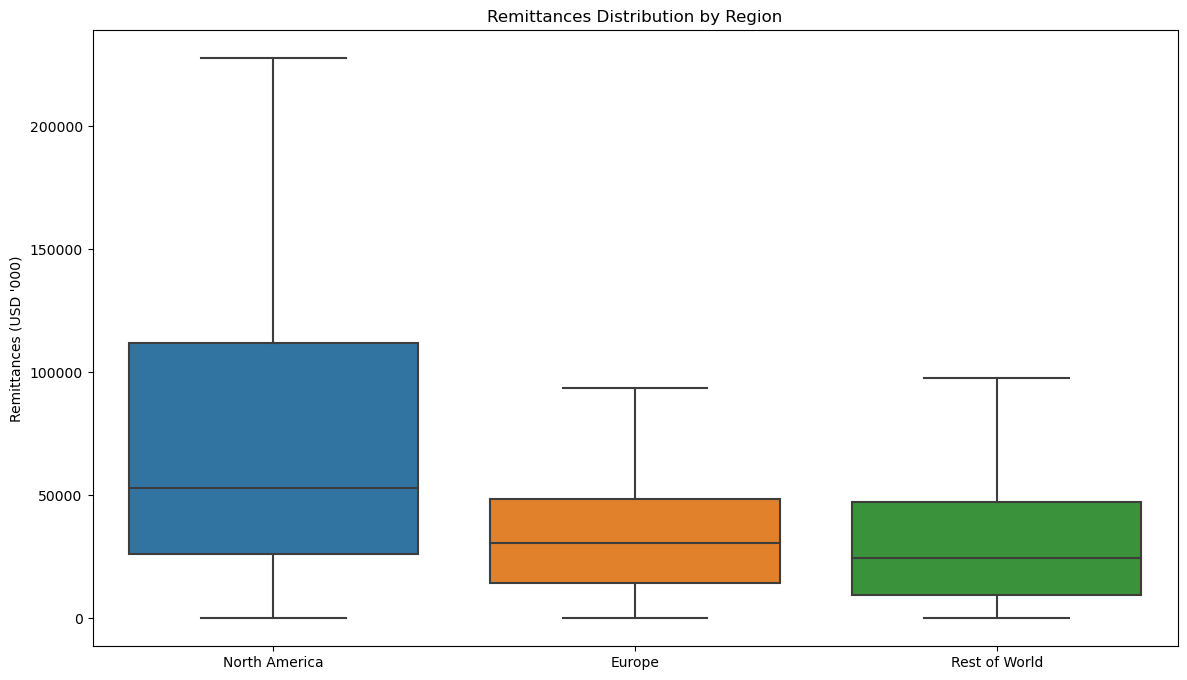

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "Diaspora Remittances.csv"
remittances_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(remittances_data.head())

# Check for missing values
print("Missing values:\n", remittances_data.isnull().sum())

# Check for missing values in the specified columns
missing_values_cols = ['North America', 'Europe', 'Rest of World']
remittances_data[missing_values_cols] = remittances_data[missing_values_cols].replace(',', '', regex=True).astype(float)

# Visualize remittances distribution by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=remittances_data[missing_values_cols])
plt.title('Remittances Distribution by Region')
plt.ylabel('Remittances (USD \'000)')
plt.show()


**Visualizing Trends Over Time:**

A Spline Chart is used to visualize the overall trend in total remittances over the years.

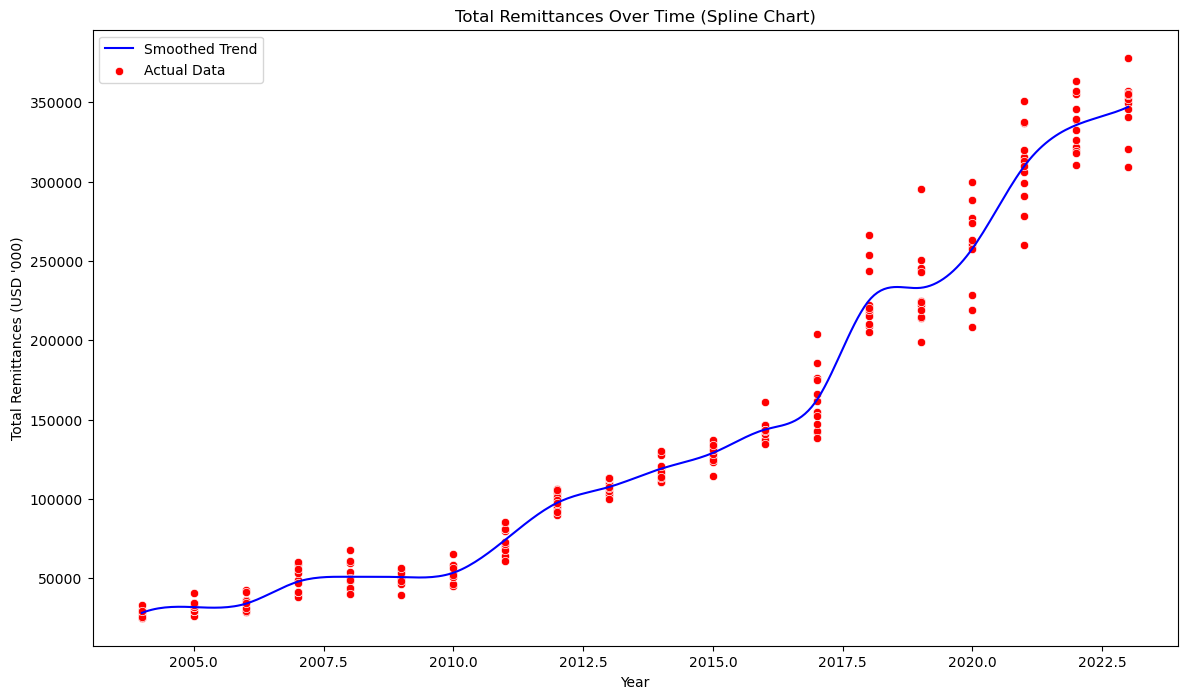

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
import warnings

# Load the dataset
file_path = "Diaspora Remittances.csv"
remittances_data = pd.read_csv(file_path)

# Suppress warnings
warnings.filterwarnings('ignore')

# Remove commas and convert 'Total Remittances (USD '000)' column to numeric
remittances_data['Total Remittances (USD \'000)'] = remittances_data['Total Remittances (USD \'000)'].replace(',', '', regex=True).astype(float)

# Visualize trends over time with a spline chart
plt.figure(figsize=(14, 8))

# Group data by 'Year' and calculate the mean for each year
trend_data = remittances_data.groupby('Year')['Total Remittances (USD \'000)'].mean().reset_index()

# Generate a smoother curve using SciPy interpolation
x_new = np.linspace(trend_data['Year'].min(), trend_data['Year'].max(), 300)
spl = make_interp_spline(trend_data['Year'], trend_data['Total Remittances (USD \'000)'], k=3)
y_smooth = spl(x_new)

# Plot the smoothed curve
plt.plot(x_new, y_smooth, label='Smoothed Trend', color='blue')

# Scatter plot for the original data points
sns.scatterplot(x='Year', y='Total Remittances (USD \'000)', data=remittances_data, marker='o', color='red', label='Actual Data')

plt.title('Total Remittances Over Time (Spline Chart)')
plt.xlabel('Year')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

In [3]:
import pandas as pd

# Load the dataset
file_path = "Diaspora Remittances.csv"
remittances_data = pd.read_csv(file_path)

# Convert 'Total Remittances (USD '000)' column to numeric
remittances_data['Total Remittances (USD \'000)'] = remittances_data['Total Remittances (USD \'000)'].replace(',', '', regex=True).astype(float)

# Explore statistical measures
mean_remittances = remittances_data['Total Remittances (USD \'000)'].mean()
median_remittances = remittances_data['Total Remittances (USD \'000)'].median()
std_dev_remittances = remittances_data['Total Remittances (USD \'000)'].std()

# Display the statistical measures
print(f"Mean Total Remittances: {mean_remittances:.2f} USD '000")
print(f"Median Total Remittances: {median_remittances:.2f} USD '000")
print(f"Standard Deviation of Total Remittances: {std_dev_remittances:.2f} USD '000")

Mean Total Remittances: 141070.40 USD '000
Median Total Remittances: 112918.53 USD '000
Standard Deviation of Total Remittances: 104175.42 USD '000


The calculated statistical measures for 'Total Remittances (USD \'000)' provide insights into the central tendency and variability of the remittance distribution over the available years.

1. **Mean Total Remittances: 141,070.40 USD '000**
   - The mean represents the average value of total remittances over the specified period. In this case, the average monthly total remittances amount to approximately $141 million. This value provides a measure of the central tendency and indicates the typical amount of remittances received each month.

2. **Median Total Remittances: 112,918.53 USD '000**
   - The median is the middle value when the total remittances are arranged in ascending order. It is less sensitive to extreme values than the mean. In this case, the median is approximately $112.9 million, suggesting that half of the months had total remittances below this value and half had total remittances above. This measure is useful for understanding the distribution's central position and is less influenced by outliers.

3. **Standard Deviation of Total Remittances: 104,175.42 USD '000**
   - The standard deviation measures the dispersion or spread of the total remittances around the mean. A higher standard deviation indicates greater variability. With a standard deviation of approximately $104.2 million, it suggests that the total remittances exhibit considerable variability from the mean. This may be due to factors such as economic fluctuations, geopolitical events, or other external influences affecting remittance patterns.

**Insights and Justification:**
- The relatively large standard deviation compared to the mean and median indicates a wide range of variability in total remittances. This variability could be influenced by various factors, including economic conditions, changes in exchange rates, and global events affecting the diaspora communities.

- The difference between the mean and median suggests that the distribution of total remittances may be right-skewed, with a few months experiencing significantly higher remittance amounts, contributing to a higher mean. Understanding the skewness of the distribution is essential for making informed decisions, as it helps to identify potential outliers.

- Stakeholders and decision-makers should consider both the mean and median, along with the standard deviation, to gain a comprehensive understanding of the distribution of total remittances. This information can be valuable for budgeting, resource allocation, and strategic planning, considering the inherent variability in monthly remittance patterns.

### Verify the quality of the data and check for any data anomalies.

**Check for Missing Values:**
Verify if there are any missing values in the dataset. Missing values can affect the accuracy of analyses.

In [4]:
# Check for missing values
print("Missing values:\n", remittances_data.isnull().sum())

Missing values:
 Year                            0
Month                           0
North America                   0
Europe                          0
Rest of World                   0
Total Remittances (USD '000)    0
dtype: int64


**Check Data Types:**
Ensure that the data types of each column are appropriate. For example, numeric columns should be of type float or integer.

In [5]:
# Display data types of columns
print("Data types:\n", remittances_data.dtypes)

Data types:
 Year                              int64
Month                             int64
North America                    object
Europe                           object
Rest of World                    object
Total Remittances (USD '000)    float64
dtype: object


**Check for Duplicates:**
Identify and handle any duplicate rows in the dataset.

In [6]:
# Check for duplicate rows
duplicate_rows = remittances_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


**Descriptive Statistics:**
Examine descriptive statistics to identify potential outliers or unusual values.

In [7]:
# Display summary statistics
print("Summary statistics:\n", remittances_data.describe())

Summary statistics:
               Year       Month  Total Remittances (USD '000)
count   239.000000  239.000000                    239.000000
mean   2013.460251    6.476987                 141070.398410
std       5.757484    3.448068                 104175.424468
min    2004.000000    1.000000                  25154.000000
25%    2008.500000    3.500000                  50517.260000
50%    2013.000000    6.000000                 112918.530000
75%    2018.000000    9.000000                 218918.340000
max    2023.000000   12.000000                 378053.010000


**Visual Inspection:**
Manually inspect a sample of the data to identify any unusual patterns or anomalies.

In [8]:
# Display a sample of the data
print("Sample data:\n", remittances_data.sample(5))

Sample data:
      Year  Month North America     Europe Rest of World  \
137  2012      7     41,694.36  26,568.91     24,473.18   
9    2023     10    202,739.19  64,521.36     88,363.28   
113  2014      7     52,618.44  31,374.31     33,108.22   
42   2020      8    159,722.80  47,591.46     66,824.18   
53   2019      7    108,511.60  45,583.18     70,392.54   

     Total Remittances (USD '000)  
137                      92736.45  
9                       355623.83  
113                     117100.97  
42                      274138.44  
53                      224487.33  


**Now, let's address the data type issue and convert the relevant columns to numeric types:**

In [9]:
# Convert 'North America,' 'Europe,' and 'Rest of World' columns to numeric
remittances_data[['North America', 'Europe', 'Rest of World']] = remittances_data[['North America', 'Europe', 'Rest of World']].replace(',', '', regex=True).astype(float)

# Display updated data types
print("Updated Data types:\n", remittances_data.dtypes)

Updated Data types:
 Year                              int64
Month                             int64
North America                   float64
Europe                          float64
Rest of World                   float64
Total Remittances (USD '000)    float64
dtype: object


Let's further investigate and handle any non-numeric values in the 'Total Remittances (USD '000)' column and then convert it to a numeric data type.

In [10]:
# Remove commas and convert 'Total Remittances (USD '000)' column to numeric
remittances_data['Total Remittances (USD \'000)'] = remittances_data['Total Remittances (USD \'000)'].replace(',', '', regex=True)

# Convert to numeric, coerce errors to handle non-numeric values
remittances_data['Total Remittances (USD \'000)'] = pd.to_numeric(remittances_data['Total Remittances (USD \'000)'], errors='coerce')

# Display updated data types
print("Updated Data types:\n", remittances_data.dtypes)

Updated Data types:
 Year                              int64
Month                             int64
North America                   float64
Europe                          float64
Rest of World                   float64
Total Remittances (USD '000)    float64
dtype: object


## Step 2: Data processing
1. Identify and Handle Outliers:


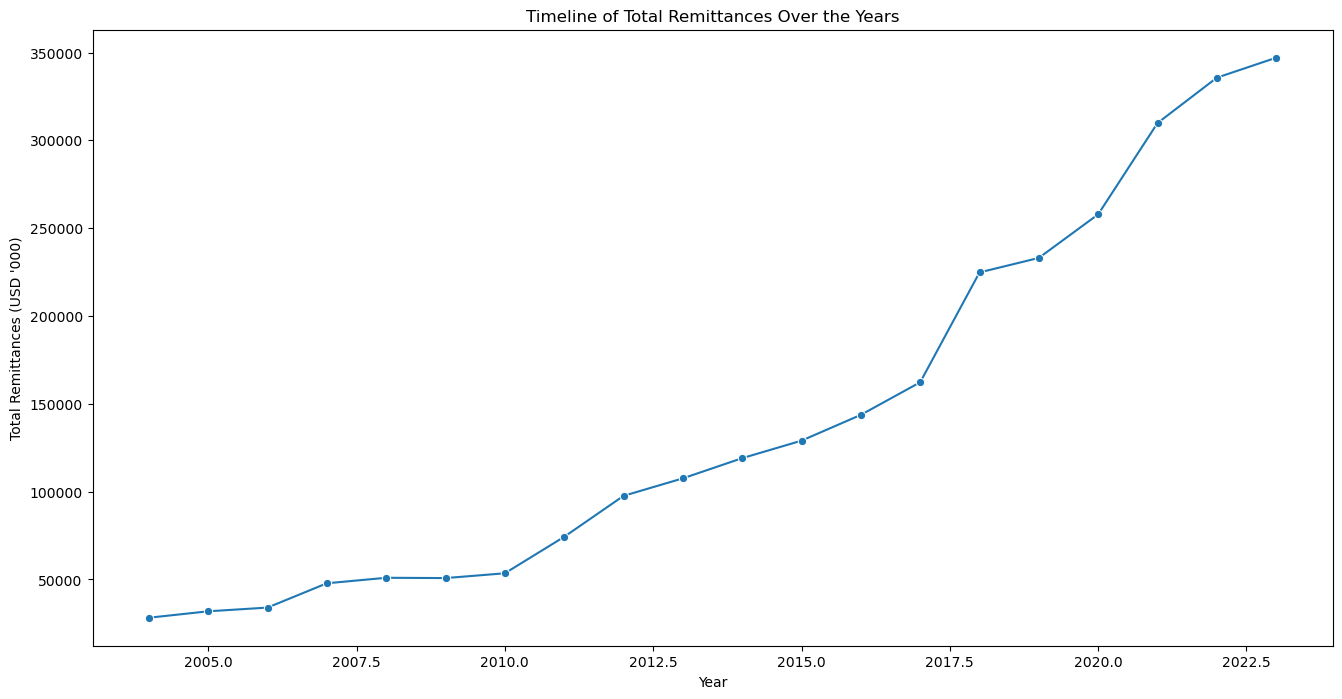

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize timeline of total remittances
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Total Remittances (USD \'000)', data=remittances_data, marker='o', ci=None)
plt.title('Timeline of Total Remittances Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Remittances (USD \'000)')
plt.show()

### 1. Normalize or Standardize Numerical Features:
Normalization and standardization are techniques used to bring numerical features to a common scale. Here, I'll demonstrate standardization using the StandardScaler from scikit-learn.

In [12]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features for standardization
numerical_features = ['Year', 'Month', 'North America', 'Europe', 'Rest of World']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
remittances_data[numerical_features] = scaler.fit_transform(remittances_data[numerical_features])

### 2. Split Data into Training and Validation Sets:
Now, let's split the data into training and validation sets. We'll use a common practice of using a certain percentage (e.g., 80%) of the data for training and the remaining for validation.

In [13]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = remittances_data[['Year', 'Month', 'North America', 'Europe', 'Rest of World']]
y = remittances_data['Total Remittances (USD \'000)']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)

Training set shape: (191, 5) (191,)
Validation set shape: (48, 5) (48,)


In [14]:
# Display data types of columns
print("Data types:\n", remittances_data.dtypes)

Data types:
 Year                            float64
Month                           float64
North America                   float64
Europe                          float64
Rest of World                   float64
Total Remittances (USD '000)    float64
dtype: object


## Step 3 Time Series Analysis:
#### a. Identifying Trends, Seasonality, and Residuals:
i. Rolling Statistics:
We'll calculate rolling statistics such as rolling mean and rolling standard deviation to identify trends and variations in the total remittances over time.

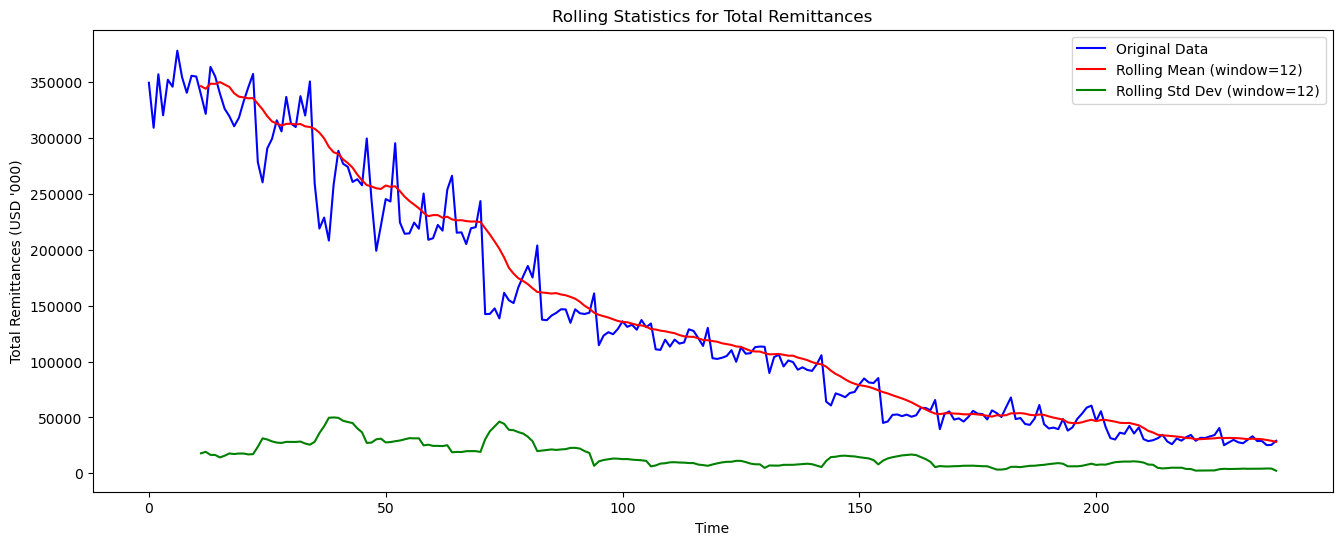

In [15]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = remittances_data['Total Remittances (USD \'000)'].rolling(window=12).mean()
rolling_std = remittances_data['Total Remittances (USD \'000)'].rolling(window=12).std()

# Plot original data along with rolling statistics
plt.figure(figsize=(16, 6))
plt.plot(remittances_data['Total Remittances (USD \'000)'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (window=12)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (window=12)', color='green')

plt.title('Rolling Statistics for Total Remittances')
plt.xlabel('Time')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

### ii. Moving Averages:
We'll apply different moving average windows to smooth out noise and identify underlying trends.

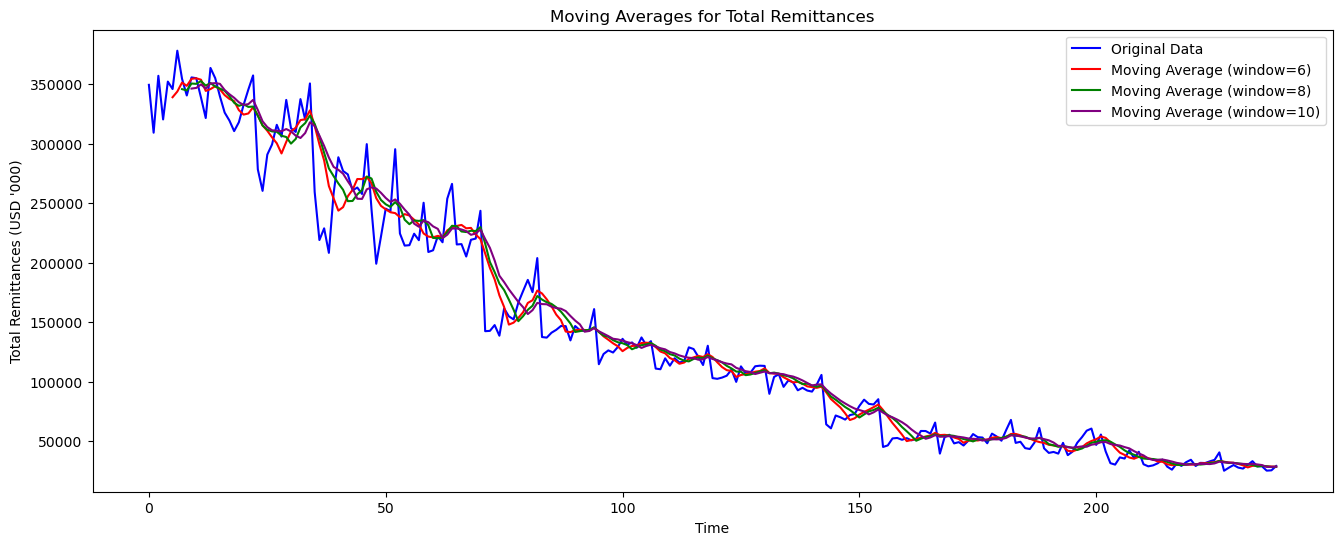

In [16]:
# Apply different moving average windows
ma_6 = remittances_data['Total Remittances (USD \'000)'].rolling(window=6).mean()
ma_8 = remittances_data['Total Remittances (USD \'000)'].rolling(window=8).mean()
ma_10 = remittances_data['Total Remittances (USD \'000)'].rolling(window=10).mean()

# Plot original data along with moving averages
plt.figure(figsize=(16, 6))
plt.plot(remittances_data['Total Remittances (USD \'000)'], label='Original Data', color='blue')
plt.plot(ma_6, label='Moving Average (window=6)', color='red')
plt.plot(ma_8, label='Moving Average (window=8)', color='green')
plt.plot(ma_10, label='Moving Average (window=10)', color='purple')

plt.title('Moving Averages for Total Remittances')
plt.xlabel('Time')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

**Exponential Smoothing:** Use methods like single or double exponential smoothing to identify trends and seasonality.

We can apply single and double exponential smoothing to identify trends and seasonality in the total remittances data.

Single Exponential Smoothing:

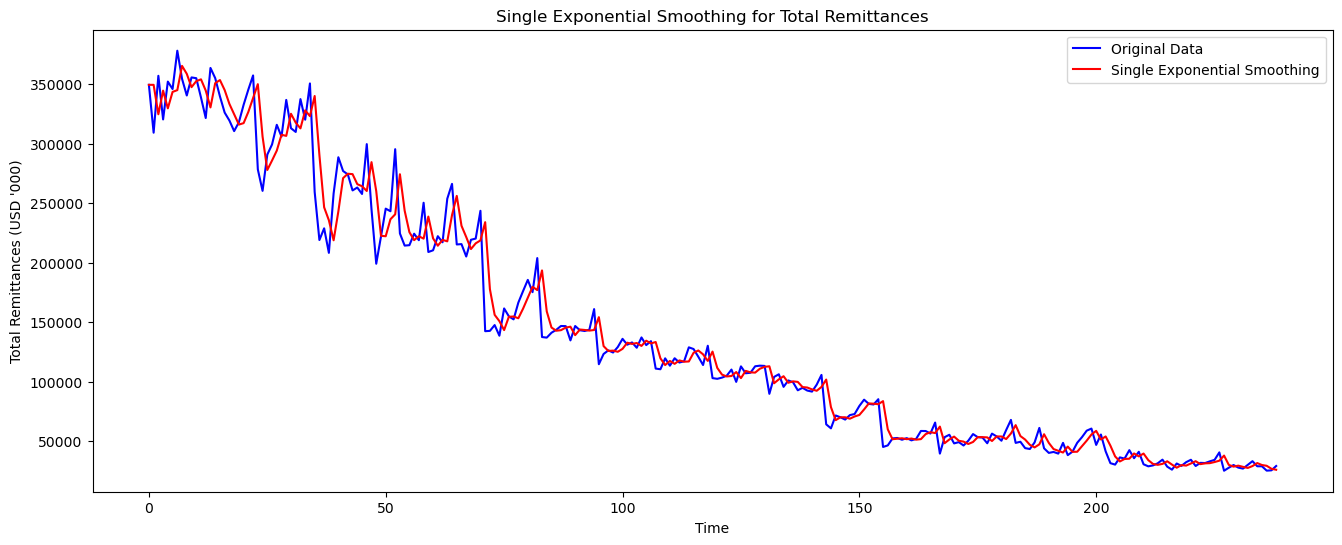

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings('ignore')

# Extract the total remittances data
total_remittances = remittances_data['Total Remittances (USD \'000)']

# Apply single exponential smoothing
model_single = SimpleExpSmoothing(total_remittances)
fit_single = model_single.fit()

# Plot original data along with the smoothed values
plt.figure(figsize=(16, 6))
plt.plot(total_remittances, label='Original Data', color='blue')
plt.plot(fit_single.fittedvalues, label='Single Exponential Smoothing', color='red')

plt.title('Single Exponential Smoothing for Total Remittances')
plt.xlabel('Time')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

Double Exponential Smoothing (Holt's Method):

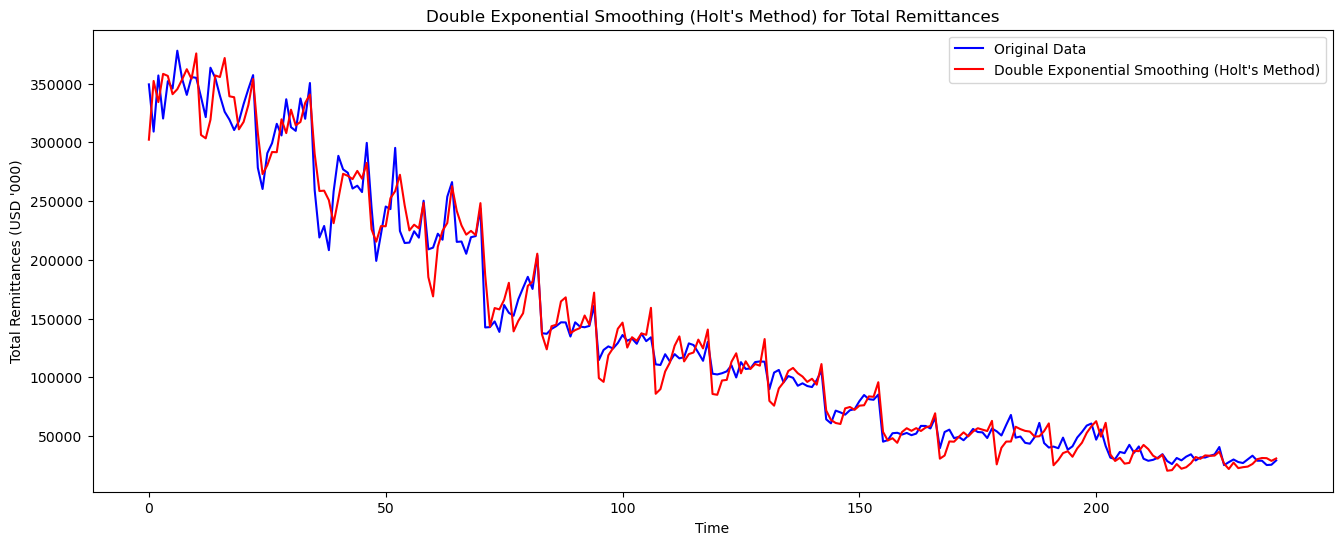

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply double exponential smoothing (Holt's Method)
model_double = ExponentialSmoothing(total_remittances, trend='add', seasonal='add', seasonal_periods=12)
fit_double = model_double.fit()

# Plot original data along with the smoothed values
plt.figure(figsize=(16, 6))
plt.plot(total_remittances, label='Original Data', color='blue')
plt.plot(fit_double.fittedvalues, label='Double Exponential Smoothing (Holt\'s Method)', color='red')

plt.title('Double Exponential Smoothing (Holt\'s Method) for Total Remittances')
plt.xlabel('Time')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

### b. Understanding Temporal Dependencies:
Correlation Analysis: Explore correlation matrices to identify relationships between the current and lagged values of the time series.

Feature Lagging: Create lag features and examine their correlation with the target variable to understand temporal dependencies.

Time Series Cross-Correlation: Use cross-correlation functions to identify time lags that exhibit significant relationships.

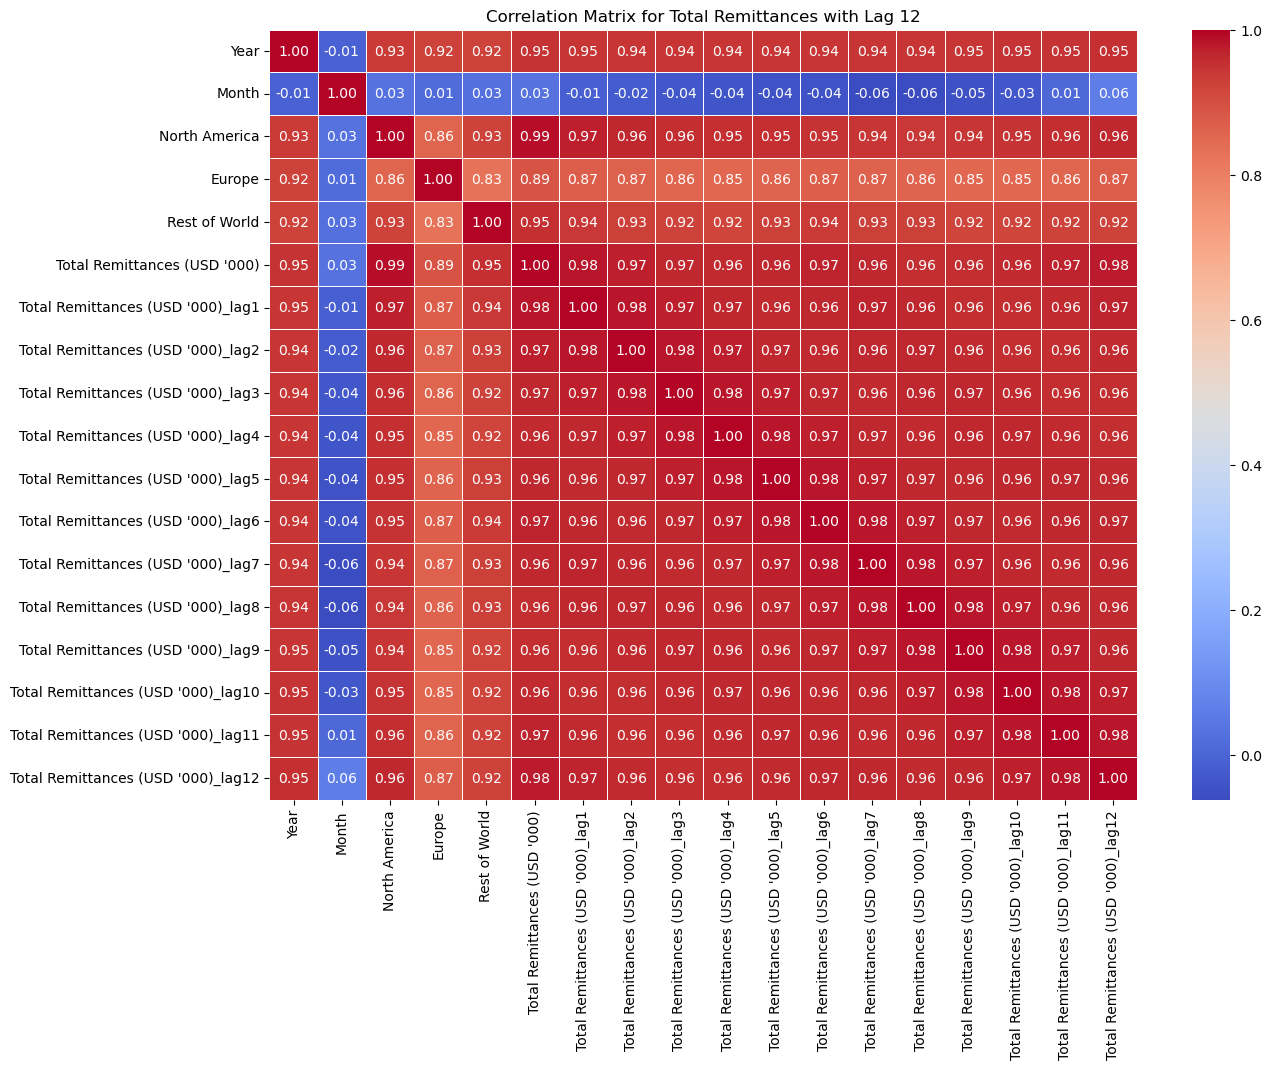

In [19]:
import numpy as np

# Define a function to create lag features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for i in range(1, lag+1):
        lagged_data[f'Total Remittances (USD \'000)_lag{i}'] = data['Total Remittances (USD \'000)'].shift(i)
    return lagged_data

# Set the lag value
lag_value = 12  # You can adjust this value based on your analysis

# Create lagged features
lagged_data = create_lagged_features(remittances_data, lag=lag_value)

# Calculate correlation matrix
correlation_matrix = lagged_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix for Total Remittances with Lag {lag_value}')
plt.show()

This code calculates lagged features (lags 1 to 12) and generates a correlation matrix heatmap to visualize the relationships between current and lagged values of the total remittances.

### Suitable Replacement for Time Series Decomposition:
Moving Averages as Baseline: Use moving averages (simple, weighted, or exponentially weighted) as a baseline model to capture trends and seasonality.
Seasonal Subseries Plot: Create subseries plots for each season to visually inspect and understand seasonality.
Box-Jenkins Methodology: Explore Box-Jenkins methodology, which involves identification, estimation, and diagnostic checking, to build an ARIMA model without explicit decomposition.

1. Moving Averages as Baseline:
Moving averages, including simple, weighted, or exponentially weighted, can serve as a baseline model to capture trends and seasonality. Here, I'll demonstrate the use of a simple moving average.

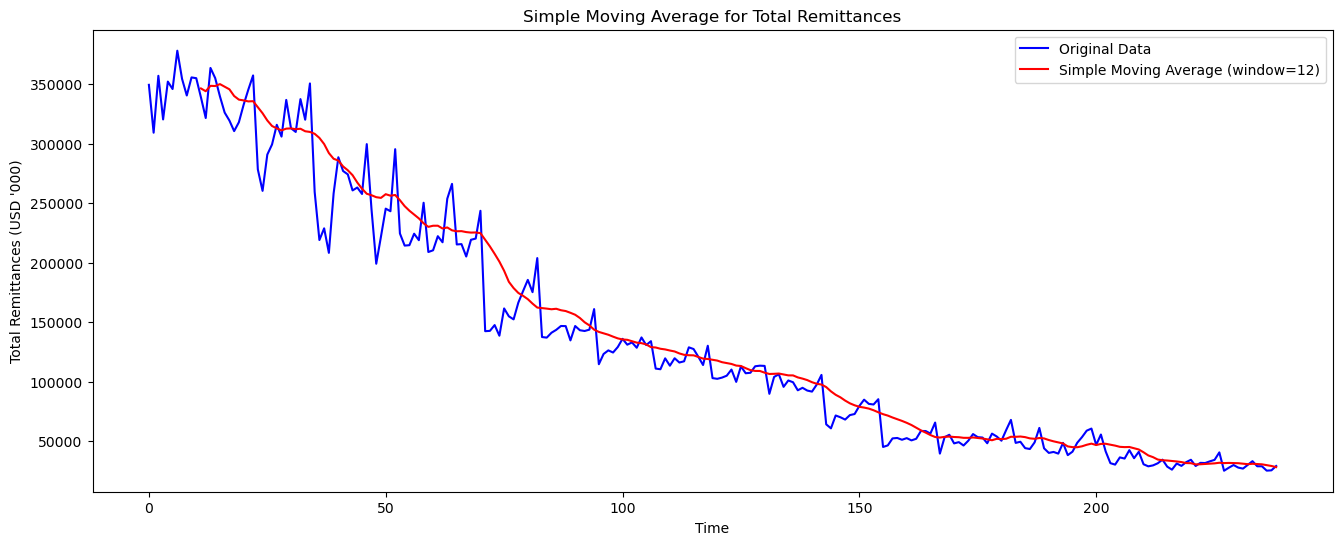

In [20]:
# Calculate simple moving average
window_size = 12  # You can adjust this based on the observed seasonality
simple_moving_average = remittances_data['Total Remittances (USD \'000)'].rolling(window=window_size).mean()

# Plot original data along with simple moving average
plt.figure(figsize=(16, 6))
plt.plot(remittances_data['Total Remittances (USD \'000)'], label='Original Data', color='blue')
plt.plot(simple_moving_average, label=f'Simple Moving Average (window={window_size})', color='red')

plt.title('Simple Moving Average for Total Remittances')
plt.xlabel('Time')
plt.ylabel('Total Remittances (USD \'000)')
plt.legend()
plt.show()

2. Seasonal Subseries Plot:
A seasonal subseries plot involves creating subplots for each season, allowing you to visually inspect and understand seasonality.

ADF Statistic: -3.9891569504994946
p-value: 0.001468365090763134
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
The time series is stationary.


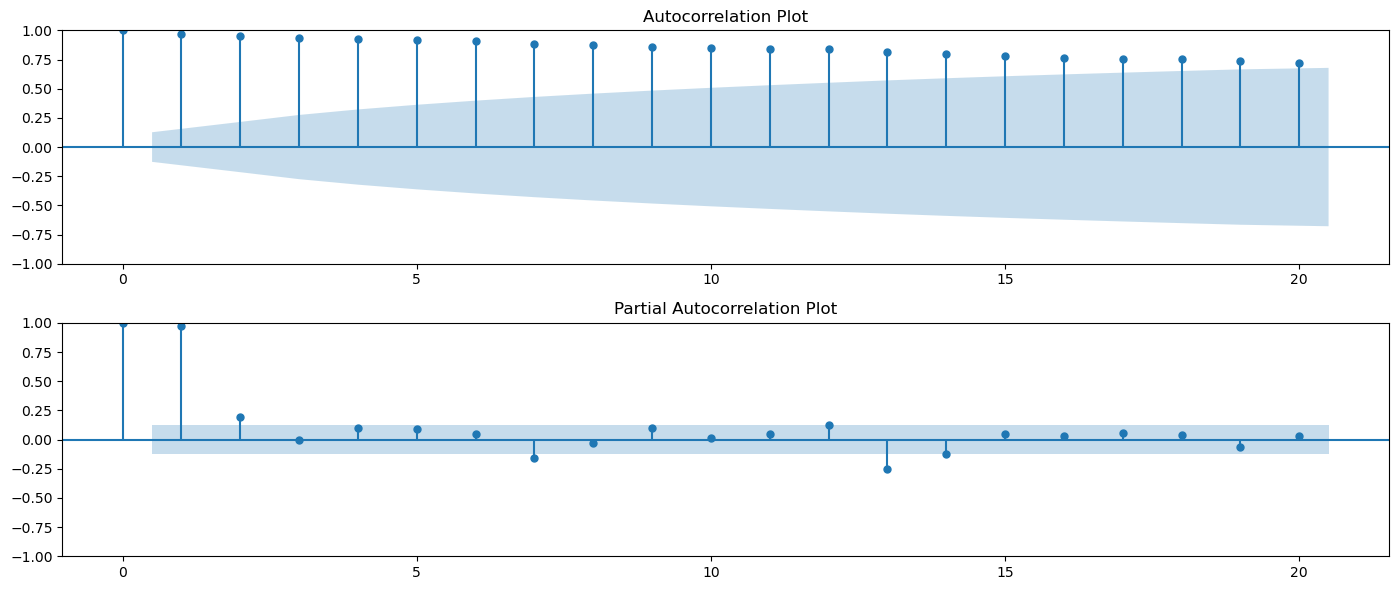

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Function to perform stationarity test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is non-stationary.')

# Original time series
total_remittances = remittances_data['Total Remittances (USD \'000)']

# Check stationarity
check_stationarity(total_remittances)

# Plot autocorrelation and partial autocorrelation plots
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(total_remittances, lags=20, ax=plt.gca())
plt.title('Autocorrelation Plot')

plt.subplot(2, 1, 2)
plot_pacf(total_remittances, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

### 1. Identification:
Autocorrelation and Partial Autocorrelation Analysis:

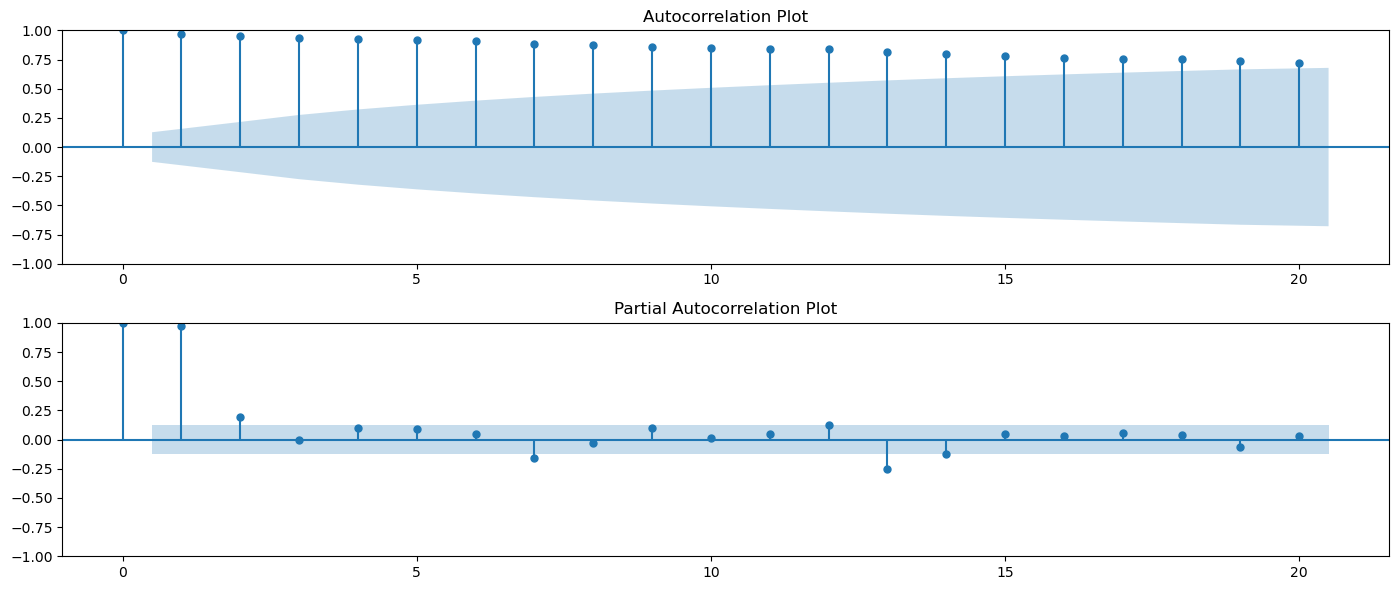

In [22]:
# Plot autocorrelation and partial autocorrelation plots
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(total_remittances, lags=20, ax=plt.gca())
plt.title('Autocorrelation Plot')

plt.subplot(2, 1, 2)
plot_pacf(total_remittances, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()